In [1]:
from keras.layers import Input,Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/training_set1'
valid_path = 'Dataset/testing_set1'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

In [3]:
  # useful for getting number of classes
folders = glob('Dataset/training_set1/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary() 


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [4]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/training_set1',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset/test_set1',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss

Found 1560 images belonging to 2 classes.
Found 365 images belonging to 2 classes.
Epoch 1/10
49/49 [==============================] - 559s 11s/step - loss: 0.1621 - accuracy: 0.9462 - val_loss: 0.1142 - val_accuracy: 0.9863
Epoch 2/10
49/49 [==============================] - 533s 11s/step - loss: 0.0298 - accuracy: 0.9897 - val_loss: 0.0023 - val_accuracy: 0.9863
Epoch 3/10
49/49 [==============================] - 532s 11s/step - loss: 0.0265 - accuracy: 0.9929 - val_loss: 0.6010 - val_accuracy: 0.9863
Epoch 4/10
49/49 [==============================] - 536s 11s/step - loss: 0.0298 - accuracy: 0.9865 - val_loss: 3.5943e-04 - val_accuracy: 0.9890
Epoch 5/10
49/49 [==============================] - 548s 11s/step - loss: 0.0161 - accuracy: 0.9955 - val_loss: 4.3645e-04 - val_accuracy: 0.9890
Epoch 6/10
49/49 [==============================] - 552s 11s/step - loss: 0.0126 - accuracy: 0.9974 - val_loss: 3.6941e-04 - val_accuracy: 0.9890
Epoch 7/10
49/49 [==============================] - 5

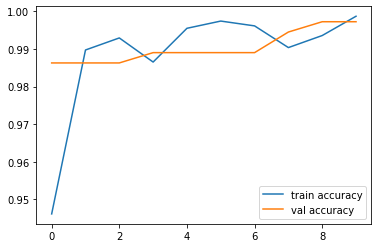

<Figure size 432x288 with 0 Axes>

In [6]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show() 
plt.savefig('AccVal_acc')

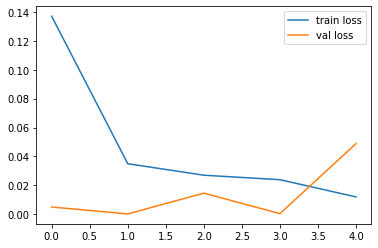

<Figure size 432x288 with 0 Axes>

In [7]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')